In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import classification_report, roc_auc_score,precision_score, recall_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("Customer Churn - Telecom.csv", sep = ";")

In [3]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

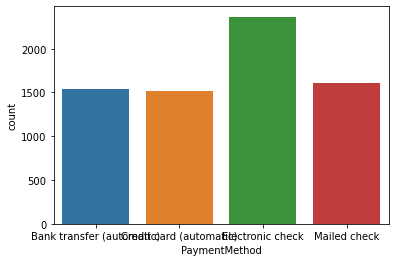

In [8]:
sns.countplot(data=data, x="PaymentMethod" )

In [ ]:
data.head()

In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.Jun,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [6]:
data.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
data['TotalCharges'] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data['MonthlyCharges'] = pd.to_numeric(data["MonthlyCharges"], errors="coerce")

In [9]:
numerical_columns = ["tenure", "TotalCharges","MonthlyCharges"]

categorical_columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
                       "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                      "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

<AxesSubplot:>

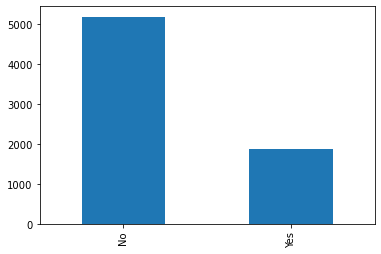

In [10]:
data["Churn"].value_counts().plot(kind="bar")

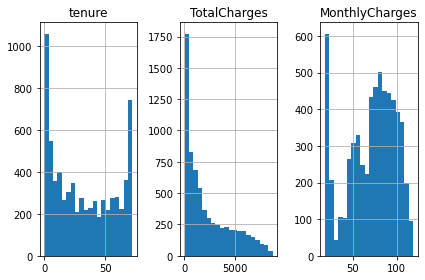

In [11]:
fig, ax = plt.subplots(1,3)
data[numerical_columns].hist(ax=ax, bins=20)
fig.tight_layout()
plt.show();

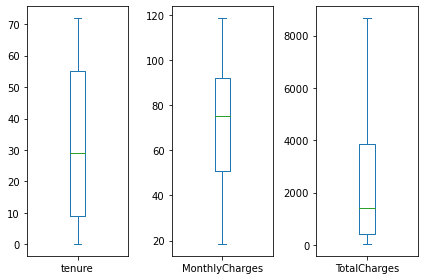

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
data.tenure.plot(ax=ax1,kind='box')
data.MonthlyCharges.plot(ax=ax2,kind='box')
data.TotalCharges.plot(ax=ax3,kind='box')
fig.tight_layout()
plt.show();

In [18]:
data[data["Churn"] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


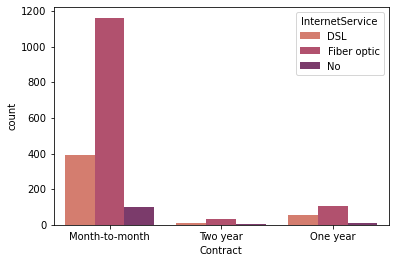

In [23]:
def barx(feature):
    sns.countplot(x='Contract',data=data[data["Churn"] == "Yes"],hue=feature,palette="flare")
    plt.show()
    
barx(data["InternetService"])

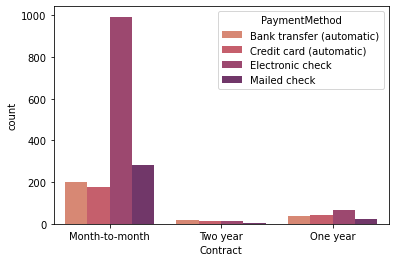

In [34]:
def barx(feature):
    sns.countplot(x='Contract',data=data[data["Churn"] == "Yes"],hue=feature,palette="flare")
    plt.show()
    
barx(data["PaymentMethod"])

In [10]:
def bar(feature):
    sns.countplot(x='Churn',data=data,hue=feature,palette="flare")
    plt.title(f'Churn rate by {feature}')
    plt.show()
    
def barNum(feature):
    ax = sns.histplot(x = feature, hue = 'Churn', data = data, multiple='dodge')
    ax.set(xlabel=feature, ylabel = "Count")
    plt.show()

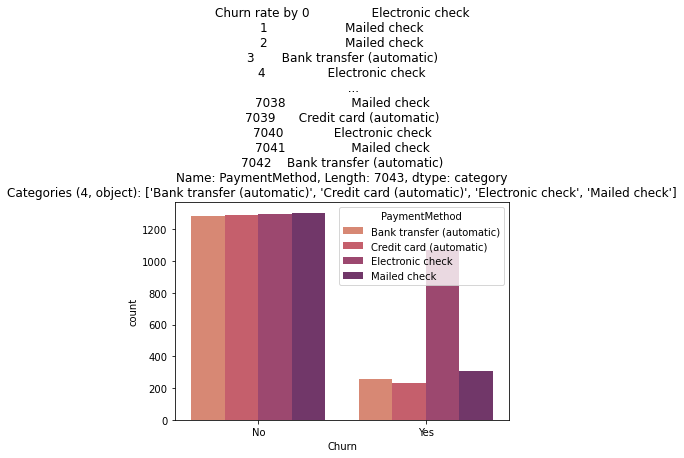

In [11]:
bar(data["PaymentMethod"])

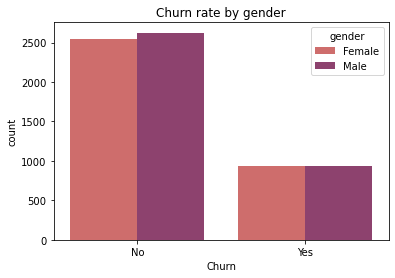

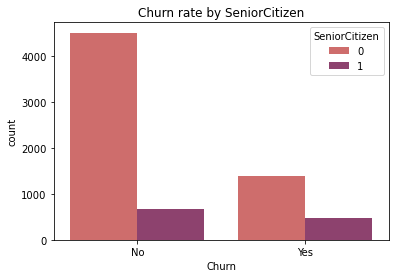

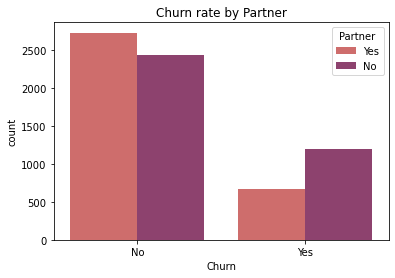

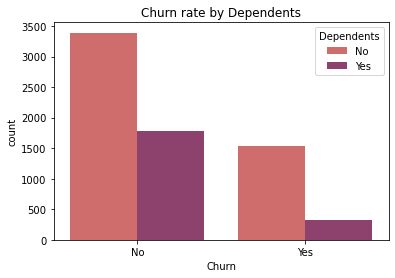

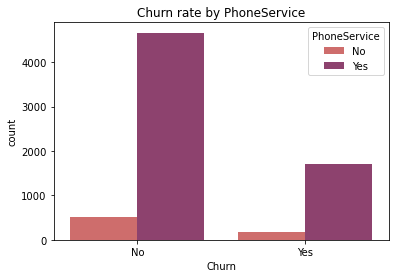

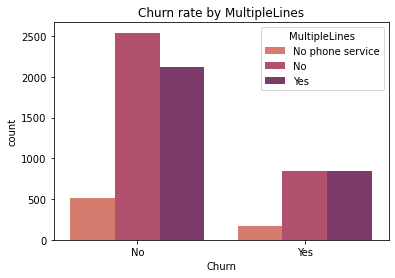

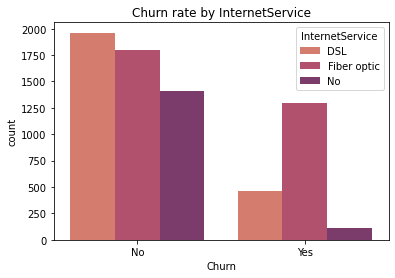

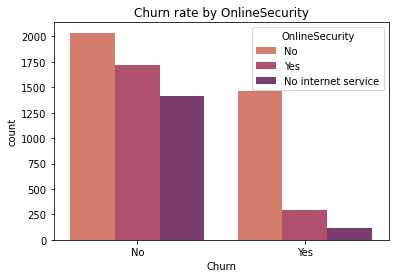

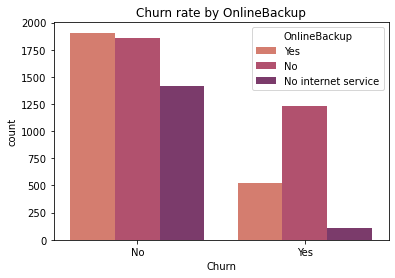

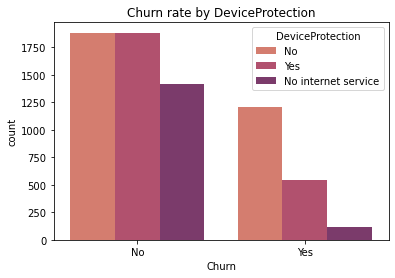

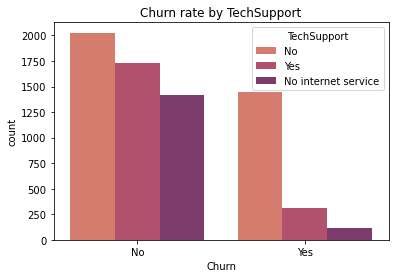

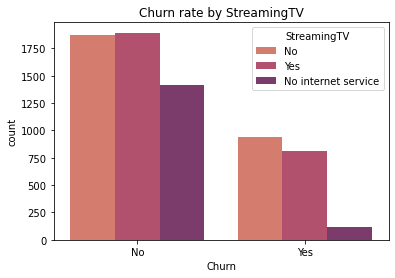

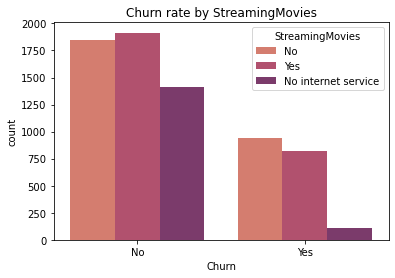

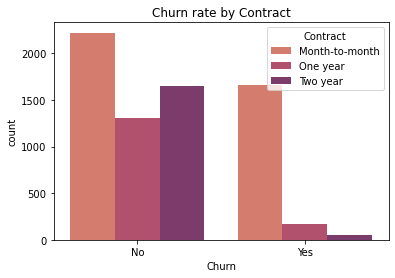

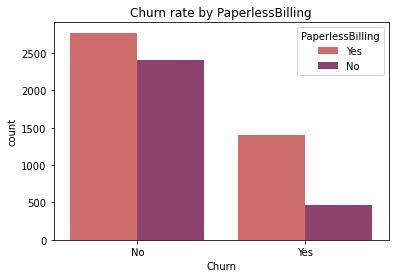

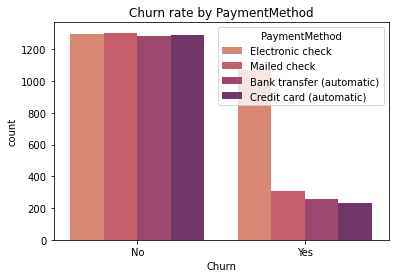

In [14]:
for i in categorical_columns:
    bar(i)

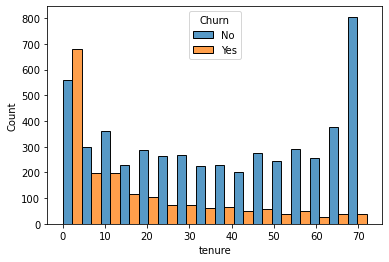

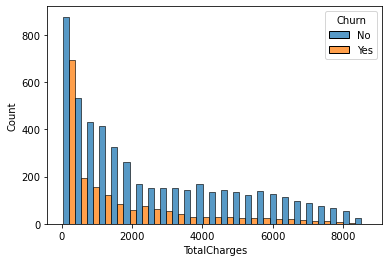

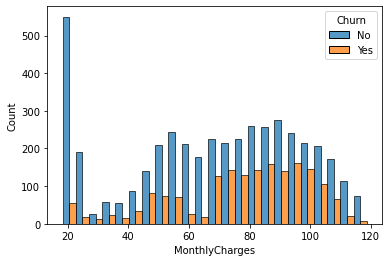

In [15]:
for i in numerical_columns:
    barNum(i)

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data = data.drop("customerID", axis = 1)

In [18]:
data[["Partner","Dependents","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]] = data[["Partner","Dependents","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]].replace({"Yes": 1, "No": 0})




In [19]:
data["TotalCharges"] = data["TotalCharges"].fillna(data.groupby("Churn")["TotalCharges"].transform("median"))
data["MonthlyCharges"] = data["MonthlyCharges"].fillna(data.groupby("Churn")["MonthlyCharges"].transform("median"))

In [20]:
for col in data:
    if data[col].dtype == 'object':
        continue
    else:
        numeric_series = data[col][pd.to_numeric(data[col], errors='coerce').notnull()]
        print(f"Min of {col}: {numeric_series.min()}")
        print(f"Max of {col}: {numeric_series.max()}")
        print()

Min of SeniorCitizen: 0
Max of SeniorCitizen: 1

Min of Partner: 0
Max of Partner: 1

Min of Dependents: 0
Max of Dependents: 1

Min of tenure: 0
Max of tenure: 72

Min of PhoneService: 0
Max of PhoneService: 1

Min of PaperlessBilling: 0
Max of PaperlessBilling: 1

Min of MonthlyCharges: 18.25
Max of MonthlyCharges: 118.75

Min of TotalCharges: 18.85
Max of TotalCharges: 8684.8

Min of Churn: 0
Max of Churn: 1



In [21]:
quartiles = pd.+(data["tenure"], q=4)

print(quartiles)

0       (-0.001, 9.0]
1        (29.0, 55.0]
2       (-0.001, 9.0]
3        (29.0, 55.0]
4       (-0.001, 9.0]
            ...      
7038      (9.0, 29.0]
7039     (55.0, 72.0]
7040      (9.0, 29.0]
7041    (-0.001, 9.0]
7042     (55.0, 72.0]
Name: tenure, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 9.0] < (9.0, 29.0] < (29.0, 55.0] < (55.0, 72.0]]


In [22]:
def tenure_quartile(value):
    if value >= 0 and value <= 9:
        return "0-9 Tenure"
    elif value >9 and value <= 29:
        return "10-29 Tenure"
    elif value  > 29 and value <= 55:
        return "30-55 Tenure"
    else:
        return "55+"

data["tenure"] = data["tenure"].apply(tenure_quartile)

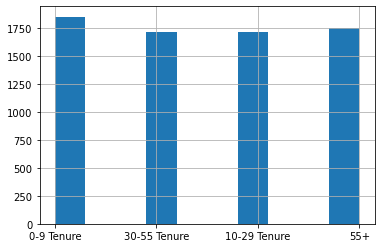

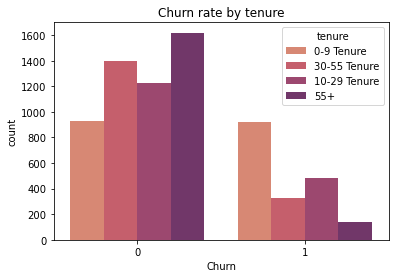

In [23]:
data["tenure"].hist()
plt.show()

bar("tenure")

In [24]:
quartiles = pd.qcut(data["MonthlyCharges"], q=4)

print(quartiles)

0       (18.249, 54.75]
1        (54.75, 71.35]
2       (18.249, 54.75]
3       (18.249, 54.75]
4        (54.75, 71.35]
             ...       
7038     (71.35, 89.85]
7039    (89.85, 118.75]
7040     (54.75, 71.35]
7041     (71.35, 89.85]
7042    (89.85, 118.75]
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(18.249, 54.75] < (54.75, 71.35] < (71.35, 89.85] < (89.85, 118.75]]


In [25]:
def monthly_charges_quartile(value):
    if value >= 0 and value <= 54.75:
        return "Lower than 54.75"
    elif value >54.75 and value <= 71.35:
        return "Between 54.75 and 71.35"
    elif value  > 71.35 and value <= 89.85:
        return "Between 71.35 and 89.85"
    elif value > 89.85:
        return "Higher than 89.85"

data["MonthlyCharges"] = data["MonthlyCharges"].apply(monthly_charges_quartile)

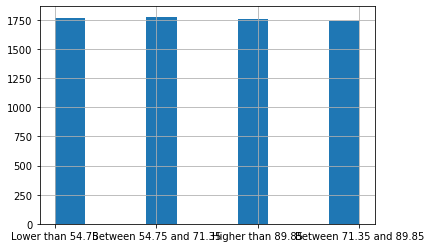

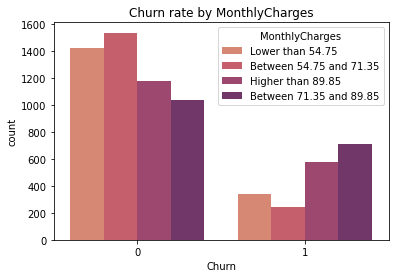

In [26]:
data["MonthlyCharges"].hist()
plt.show()

bar("MonthlyCharges")

In [27]:
quartiles = pd.qcut(data["TotalCharges"], q=4)

print(quartiles)

0       (18.849, 446.075]
1       (1432.55, 3786.6]
2       (18.849, 446.075]
3       (1432.55, 3786.6]
4       (18.849, 446.075]
              ...        
7038    (1432.55, 3786.6]
7039     (3786.6, 8684.8]
7040    (18.849, 446.075]
7041    (18.849, 446.075]
7042     (3786.6, 8684.8]
Name: TotalCharges, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(18.849, 446.075] < (446.075, 1432.55] < (1432.55, 3786.6] < (3786.6, 8684.8]]


In [28]:
def total_charges_quartile(value):
    if value >= 0 and value <= 446.075:
        return "Lower than 446.075"
    elif value >446.075 and value <= 1432.55:
        return "Between 446.0755 and 1432.55"
    elif value  > 1432.55 and value <= 3786.6:
        return "Between 1432.55 and 3786.6"
    elif value > 3786.6:
        return "Higher than 3786.6"

data["TotalCharges"] = data["TotalCharges"].apply(total_charges_quartile)

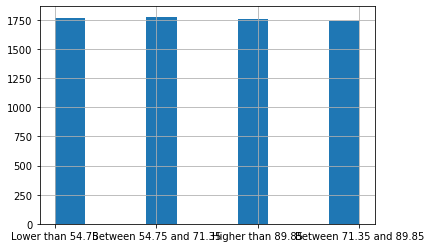

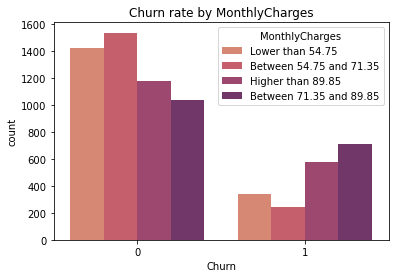

In [29]:
data["MonthlyCharges"].hist()
plt.show()

bar("MonthlyCharges")

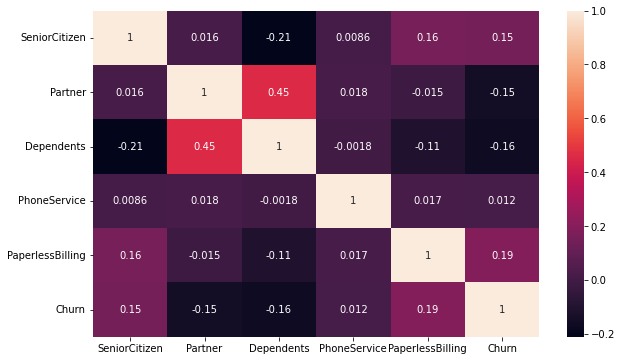

In [30]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(data.corr(), annot=True)
plt.show()

In [31]:
data.loc[(data['Dependents'] == 0) & (data['Partner'] == 0), 'FamilyStatus'] = "Alone"
data.loc[(data['Dependents'] == 1) & (data['Partner'] == 1), 'FamilyStatus'] = 'Family'
data.loc[((data['Dependents'] == 0) & (data['Partner'] == 1)) | ((data['Dependents'] == 1) & (data['Partner'] == 0)), 'FamilyStatus'] = "NotAlone"


In [32]:
data = data.drop("Dependents", axis = 1)
data = data.drop("Partner", axis = 1)

## Encoding

In [33]:
data_encoded = pd.get_dummies(data)
data_encoded

,SeniorCitizen,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,tenure_0-9 Tenure,tenure_10-29 Tenure,tenure_30-55 Tenure,tenure_55+,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_No internet service,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1,DeviceProtection_No internet service,TechSupport_0,TechSupport_1,TechSupport_No internet service,StreamingTV_0,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_Between 54.75 and 71.35,MonthlyCharges_Between 71.35 and 89.85,MonthlyCharges_Higher than 89.85,MonthlyCharges_Lower than 54.75,TotalCharges_Between 1432.55 and 3786.6,TotalCharges_Between 446.0755 and 1432.55,TotalCharges_Higher than 3786.6,TotalCharges_Lower than 446.075,FamilyStatus_Alone,FamilyStatus_Family,FamilyStatus_NotAlone
0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
2,0,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
7039,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
7040,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1


## Modeling

In [34]:
X = data_encoded.drop('Churn',axis=1)
y = data_encoded[['Churn']]

In [35]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Default Model
CART CV Mean Accuracy Score: 0.7370464425124201
CART CV Mean F1 Score: 0.5143196839432943
CART CV Mean AUC Score: 0.6907285871466475
CART CV Mean Precision Score: 0.5044567313235537
CART CV Mean Recall Score: 0.524892833077662

Hyperparameted Model
CART CV Mean Accuracy Score: 0.8037796793341506
CART CV Mean F1 Score: 0.6007445489668937
CART CV Mean AUC Score: 0.8443678052856184
CART CV Mean Precision Score: 0.655030946251498
CART CV Mean Recall Score: 0.5591532737881894


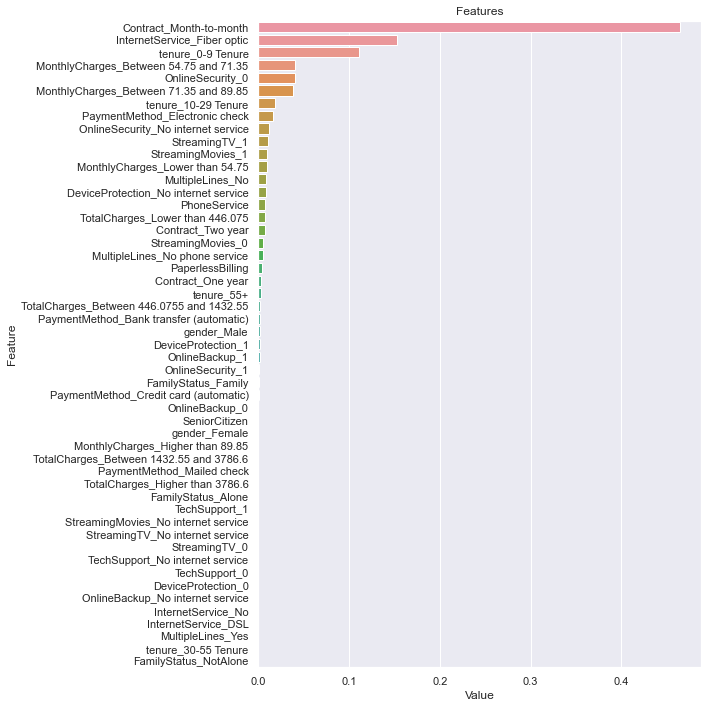

In [38]:
# CART Model

cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc","precision", "recall"])

cart_cv_acc_score = cv_results['test_accuracy'].mean()
cart_cv_f1_score = cv_results['test_f1'].mean()
cart_cv_auc_score = cv_results['test_roc_auc'].mean()
cart_cv_precision_score = cv_results['test_precision'].mean()
cart_cv_recall_score = cv_results['test_recall'].mean()

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc","precision", "recall"])

cart_hyper_acc_score = cv_results['test_accuracy'].mean()
cart_hyper_f1_score = cv_results['test_f1'].mean()
cart_hyper_auc_score = cv_results['test_roc_auc'].mean()
cart_hyper_precision_score = cv_results['test_precision'].mean()
cart_hyper_recall_score = cv_results['test_recall'].mean()

print("Default Model")
print("CART CV Mean Accuracy Score:", cart_cv_acc_score)
print("CART CV Mean F1 Score:", cart_cv_f1_score)
print("CART CV Mean AUC Score:", cart_cv_auc_score)
print("CART CV Mean Precision Score:", cart_cv_precision_score)
print("CART CV Mean Recall Score:", cart_cv_recall_score)
print()
print("Hyperparameted Model")
print("CART CV Mean Accuracy Score:", cart_hyper_acc_score)
print("CART CV Mean F1 Score:", cart_hyper_f1_score)
print("CART CV Mean AUC Score:", cart_hyper_auc_score)
print("CART CV Mean Precision Score:", cart_hyper_precision_score)
print("CART CV Mean Recall Score:", cart_hyper_recall_score)
    
plot_importance(cart_final, X)

Default Model
RF CV Mean Accuracy Score: 0.7928415135396518
RF CV Mean F1 Score: 0.568332170673336
RF CV Mean AUC Score: 0.8276842406984006
RF CV Mean Precision Score: 0.6366092699781343
RF CV Mean Recall Score: 0.5141653728940258

Hyperparameter-tuned Model
RF CV Mean Accuracy Score: 0.812865850216143
RF CV Mean F1 Score: 0.6021878535983443
RF CV Mean AUC Score: 0.8597030541166895
RF CV Mean Precision Score: 0.6919668411540478
RF CV Mean Recall Score: 0.5334532838238879


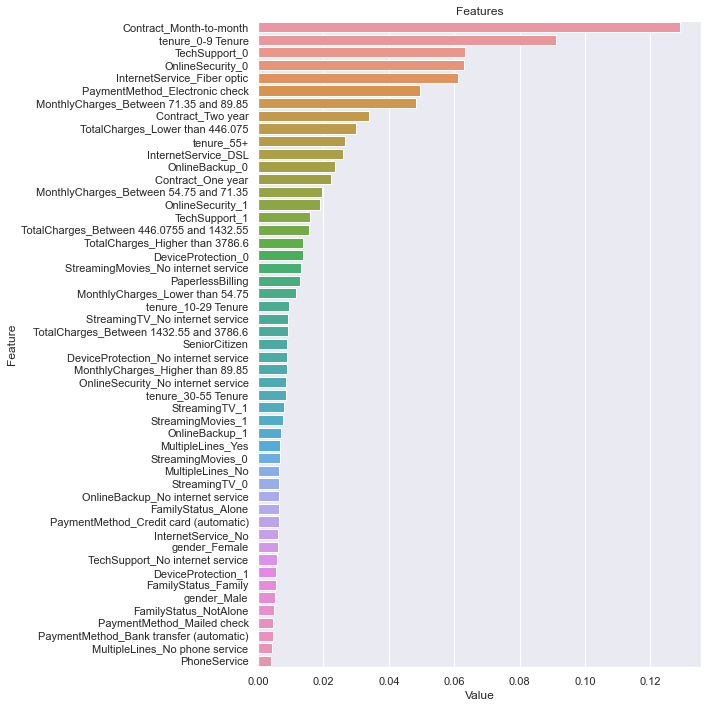

In [39]:
# Random Forest

rf_model = RandomForestClassifier(random_state=17)

cv_results = cross_validate(rf_model, X, y.values.ravel(), cv=10, scoring=["accuracy", "f1", "roc_auc","precision", "recall"])

rf_cv_acc_score = cv_results['test_accuracy'].mean()
rf_cv_f1_score = cv_results['test_f1'].mean()
rf_cv_auc_score = cv_results['test_roc_auc'].mean()
rf_cv_precision_score = cv_results['test_precision'].mean()
rf_cv_recall_score = cv_results['test_recall'].mean()

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}


rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=False).fit(X, y.values.ravel())

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y.values.ravel())

cv_results = cross_validate(rf_final, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc","precision", "recall"], verbose=False)

rf_hyper_acc_score = cv_results['test_accuracy'].mean()
rf_hyper_f1_score = cv_results['test_f1'].mean()
rf_hyper_auc_score = cv_results['test_roc_auc'].mean()
rf_hyper_precision_score = cv_results['test_precision'].mean()
rf_hyper_recall_score = cv_results['test_recall'].mean()

print("Default Model")
print("RF CV Mean Accuracy Score:", rf_cv_acc_score)
print("RF CV Mean F1 Score:", rf_cv_f1_score)
print("RF CV Mean AUC Score:", rf_cv_auc_score)
print("RF CV Mean Precision Score:", rf_cv_precision_score)
print("RF CV Mean Recall Score:", rf_cv_recall_score)
print()
print("Hyperparameter-tuned Model")
print("RF CV Mean Accuracy Score:", rf_hyper_acc_score)
print("RF CV Mean F1 Score:", rf_hyper_f1_score)
print("RF CV Mean AUC Score:", rf_hyper_auc_score)
print("RF CV Mean Precision Score:", rf_hyper_precision_score)
print("RF CV Mean Recall Score:", rf_hyper_recall_score)

plot_importance(rf_final, X)

/Users/yasir/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Default Model
XGBoost CV Mean Accuracy Score: 0.7897239338021808
XGBoost CV Mean F1 Score: 0.5826343433391361
XGBoost CV Mean AUC Score: 0.8314068276627943
XGBoost CV Mean Precision Score: 0.6162684150154587
XGBoost CV Mean Recall Score: 0.5527132227494946

Hyperparameter-tuned Model
XGBoost CV Mean Accuracy Score: 0.8122978700238725
XGBoost CV Mean F1 Score: 0.6131329467941242
XGBoost CV Mean AUC Score: 0.8600448620032216
XGBoost CV Mean Precision Score: 0.6781239300960976
XGBoost CV Mean Recall Score: 0.5602055884503448


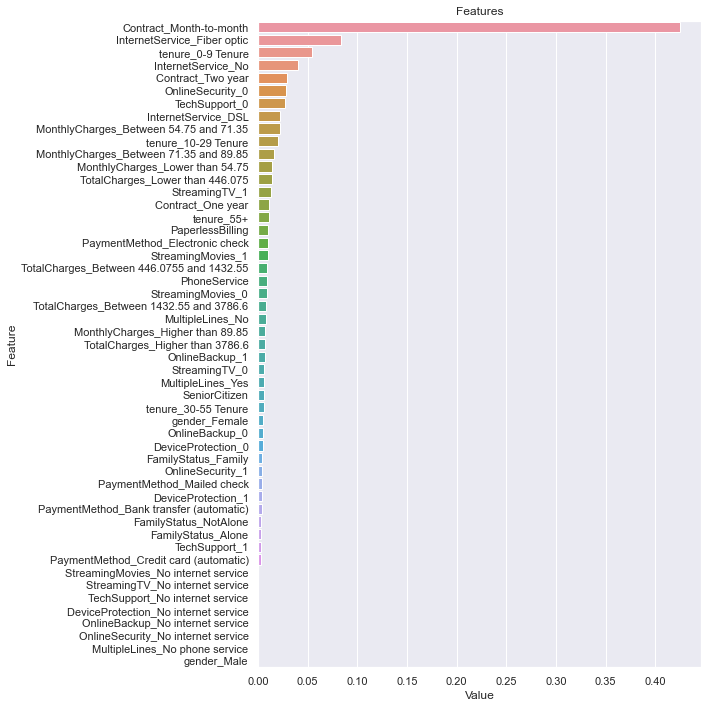

In [53]:
# XGBoost

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = y_encoded.ravel()

xgboost_model = XGBClassifier(random_state=17)
cv_results = cross_validate(xgboost_model, X, y_encoded, cv=5, scoring=["accuracy", "f1", "roc_auc","precision", "recall"], verbose=False)

xgb_cv_acc_score = cv_results['test_accuracy'].mean()
xgb_cv_f1_score = cv_results['test_f1'].mean()
xgb_cv_auc_score = cv_results['test_roc_auc'].mean()
xgb_cv_precision_score = cv_results['test_precision'].mean()
xgb_cv_recall_score = cv_results['test_recall'].mean()

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=False).fit(X, y_encoded)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y_encoded)

cv_results = cross_validate(xgboost_final, X, y_encoded, cv=5, scoring=["accuracy", "f1", "roc_auc","precision", "recall"], verbose=False)

xgb_hyper_acc_score = cv_results['test_accuracy'].mean()
xgb_hyper_f1_score = cv_results['test_f1'].mean()
xgb_hyper_auc_score = cv_results['test_roc_auc'].mean()
xgb_hyper_precision_score = cv_results['test_precision'].mean()
xgb_hyper_recall_score = cv_results['test_recall'].mean()

print("Default Model")
print("XGBoost CV Mean Accuracy Score:", xgb_cv_acc_score)
print("XGBoost CV Mean F1 Score:", xgb_cv_f1_score)
print("XGBoost CV Mean AUC Score:", xgb_cv_auc_score)
print("XGBoost CV Mean Precision Score:", xgb_cv_precision_score)
print("XGBoost CV Mean Recall Score:", xgb_cv_recall_score)
print()
print("Hyperparameter-tuned Model")
print("XGBoost CV Mean Accuracy Score:", xgb_hyper_acc_score)
print("XGBoost CV Mean F1 Score:", xgb_hyper_f1_score)
print("XGBoost CV Mean AUC Score:", xgb_hyper_auc_score)
print("XGBoost CV Mean Precision Score:", xgb_hyper_precision_score)
print("XGBoost CV Mean Recall Score:", xgb_hyper_recall_score)

plot_importance(xgboost_final, X)

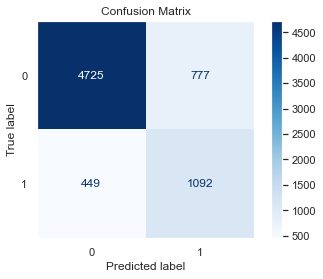

In [162]:
confusion_matrix = confusion_matrix(xgboost_final.predict(X), y.values.ravel())
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=xgboost_final.classes_)
display.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [41]:
# Logistic Regression

logreg_model = LogisticRegression(random_state=17)

cv_results = cross_validate(logreg_model, X,  y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc","precision", "recall"], verbose=False)

logreg_cv_acc_score = cv_results['test_accuracy'].mean()
logreg_cv_f1_score = cv_results['test_f1'].mean()
logred_cv_auc_score = cv_results['test_roc_auc'].mean()
logreg_cv_precision_score = cv_results['test_precision'].mean()
logreg_cv_recall_score = cv_results['test_recall'].mean()

logreg_params = {"C": [0.1, 1, 10]}

logreg_best_grid = GridSearchCV(logreg_model, logreg_params, cv=5, n_jobs=-1, verbose=False).fit(X,  y.values.ravel())

logreg_final = logreg_model.set_params(**logreg_best_grid.best_params_, random_state=17).fit(X,  y.values.ravel())

cv_results = cross_validate(logreg_final, X,  y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc","precision", "recall"], verbose=False)

logreg_hyper_score = cv_results['test_accuracy'].mean()
logreg_hyper_f1_score = cv_results['test_f1'].mean()
logreg_hyper_auc_score = cv_results['test_roc_auc'].mean()
logreg_hyper_precision_score = cv_results['test_precision'].mean()
logreg_hyper_recall_score = cv_results['test_recall'].mean()

print("Default Model")
print("Logistic CV Mean Accuracy Score:", logreg_cv_acc_score)
print("Logistic CV Mean F1 Score:", logreg_cv_f1_score)
print("Logistic CV Mean AUC Score:", logred_cv_auc_score)
print("Logistic CV Mean Precision Score:", logreg_cv_precision_score)
print("Logistic CV Mean Recall Score:", logreg_cv_recall_score)
print()
print("Hyperparameter-tuned Model")
print("Logistic CV Mean Accuracy Score:", logreg_hyper_score)
print("Logistic CV Mean F1 Score:", logreg_hyper_f1_score)
print("Logistic CV Mean AUC Score:", logreg_hyper_auc_score)
print("Logistic CV Mean Precision Score:", logreg_hyper_precision_score)
print("Logistic CV Mean Recall Score:", logreg_hyper_recall_score)

Default Model
Logistic CV Mean Accuracy Score: 0.804913321020711
Logistic CV Mean F1 Score: 0.5853009234813358
Logistic CV Mean AUC Score: 0.8493728774994963
Logistic CV Mean Precision Score: 0.6715545589490317
Logistic CV Mean Recall Score: 0.5190018781092745

Hyperparameter-tuned Model
Logistic CV Mean Accuracy Score: 0.804913321020711
Logistic CV Mean F1 Score: 0.5853009234813358
Logistic CV Mean AUC Score: 0.8493728774994963
Logistic CV Mean Precision Score: 0.6715545589490317
Logistic CV Mean Recall Score: 0.5190018781092745


In [136]:
true_positive = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
true_negative = cm[1, 1]

actual_churned_customers = 1869
actual_unchurned_customer = 5174

In [158]:
average_revenue_per_customer = 70.5
additional_marketing_cost = 10 

In [159]:
revenue_win = true_positive * average_revenue_per_customer

revenue_loss = true_negative * average_revenue_per_customer

extra_marketing_cost = false_positive * additional_marketing_cost

wonback_profit = int((true_negative * 0.2) * average_revenue_per_customer)

In [160]:
actual_revenue_win = actual_unchurned_customer * average_revenue_per_customer

actual_revenue_loss = actual_churned_customers * average_revenue_per_customer

In [161]:
print("Prediction")
print("Predicted Revenue: $", revenue_win)
print("Predicted Loss due to Churn: $", -revenue_loss)
print("Predicted Marketing Cost due to Wrong Labeled: $", -extra_marketing_cost)
print("Marketing Cost", (- additional_marketing_cost * true_negative))
print("Predicted Wonback Profit: $", wonback_profit)
print("Predicted Total Profit: $", revenue_win + wonback_profit - revenue_loss - extra_marketing_cost + (- additional_marketing_cost * true_negative))

print()
print("Actual")
print("Actual Revenue: $", actual_revenue_win)
print("Actual Loss: $", actual_revenue_loss)
print("Actual Total Profit: $", actual_revenue_win - actual_revenue_loss)
print()
print("Actual vs Prediction: $", - (actual_revenue_win - actual_revenue_loss) + (revenue_win + wonback_profit - revenue_loss - extra_marketing_cost + (- additional_marketing_cost * true_negative)))

Prediction
Predicted Revenue: $ 333112.5
Predicted Loss due to Churn: $ -76986.0
Predicted Marketing Cost due to Wrong Labeled: $ -4490
Marketing Cost -10920
Predicted Wonback Profit: $ 15397
Predicted Total Profit: $ 256113.5

Actual
Actual Revenue: $ 364767.0
Actual Loss: $ 131764.5
Actual Total Profit: $ 233002.5

Actual vs Prediction: $ 23111.0
